# Optimización - Laboratorio 8

### Isabella Salgado 201730418
### Juan Pablo Naranjo 201730006

## Librerías para el laboratorio

In [2]:
import numpy as np
from numpy import inf
from numpy import linalg as LA
from scipy.optimize import linprog
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

## Punto 1

Se considera la forma cuadrática $f(x) = x^{T}A_{i}x$ y las siguientes matrices:

$ A_1 = \begin{bmatrix}
1 & 0 \\ 
0 & 3 \\ 
\end{bmatrix} $

$A_2 = \begin{bmatrix}
-9 & 0 \\ 
0 & -9 \\ 
\end{bmatrix}$

$A_3 = \begin{bmatrix}
1 & 5 \\ 
5 & 1 \\ 
\end{bmatrix}$


$A_4 = \begin{bmatrix}
5 & 1 \\ 
1 & 5 \\ 
\end{bmatrix} $

### a)

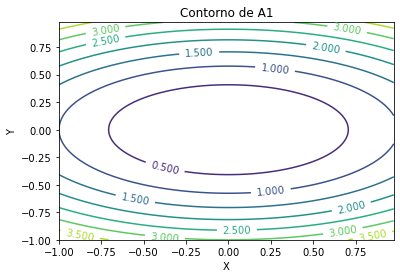

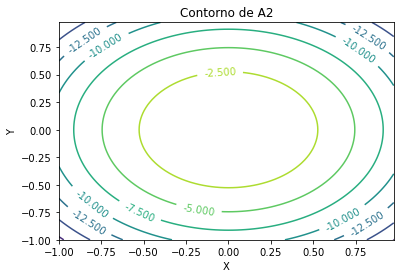

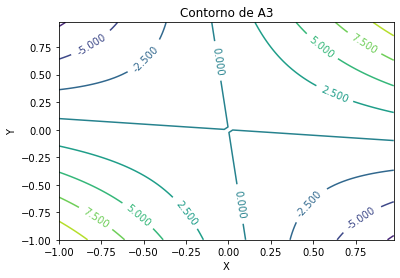

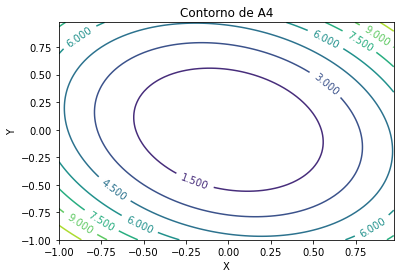

In [77]:
A1 = np.array([[1, 0],[0, 3]])
A2 = np.array([[-9, 0],[0, -9]])
A3 = np.array([[1, 5],[5, 1]])
A4 = np.array([[5, 1],[1, 5]])

matrices = [A1, A2, A3, A4]

# Contador para el saber qué título darle a cada gráfica.
c=0

# Se realiza el proceso de dibujar iterativamente.
for mat in matrices:
    step = 0.025
    x = np.arange(-1.0, 1.0, step)
    y = np.arange(-1.0, 1.0, step)
    
    X, Y = np.meshgrid(x, y)
    # Z es la forma cuadrática asociada a cada matriz
    Z = mat[0,0]*X**2 + (mat[0,1] + mat[1,0])*X*Y + mat[1,1]*Y**2

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    c+=1
    
    # Esta serie de condicionales se declaran para darle título a cada gráfica.
    if c==1:
        ax.set_title(f'Contorno de A1')
    elif c==2:
        ax.set_title(f'Contorno de A2')
    elif c==3:
        ax.set_title(f'Contorno de A3')
    elif c==4:
        ax.set_title(f'Contorno de A4')
    

### b)
Se grafica la función $f$ en el rango $[−1, 1]^2$ para cada matriz.

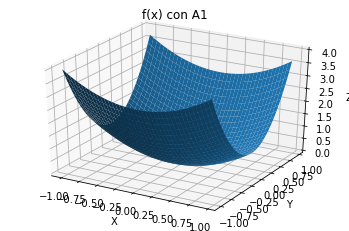

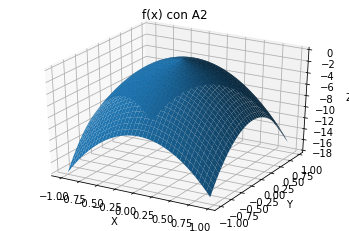

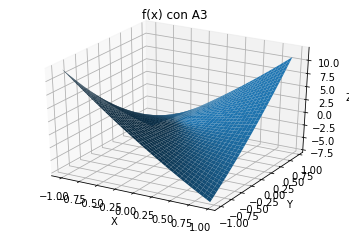

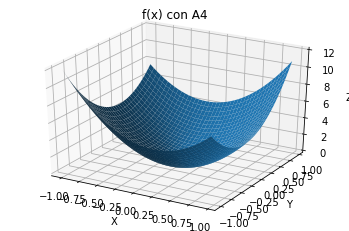

In [4]:
# Contador
c=0

# Se lleva a cabo el proceso de graficar de manera iterativa.
for mat in matrices:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(-1, 1, 0.05)
    X, Y = np.meshgrid(x, y)
    # Z es la forma cuadrática
    Z = mat[0,0]*X**2 + (mat[0,1] + mat[1,0])*X*Y + mat[1,1]*Y**2

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    c+=1
    # Se usan los mismos condicionales para saber qué título asignarle a cada gráfica.
    if c==1:
         plt.title('f(x) con A1')
    elif c==2:
         plt.title('f(x) con A2')
    elif c==3:
         plt.title('f(x) con A3')
    elif c==4:
         plt.title('f(x) con A4')

    plt.show()

### c)
Se hallan los valores propios y vectores propios para las matrices $A_1, A_2, A_3, A_4$.

Cabe mencionar que, de acuerdo al funcionamiento de la función *eig*, los valores propios se imprimen como un vector de 1x2 (todas las matrices son de dimensión 2x2), y que cada componente de este vector representa uno de los valores propios.

De igual forma, de acuerdo al funcionamiento de la función *eig*, los vectores propios se imprimen como una matriz, en la que cada columna es uno de los vectores propios. El vector propio de la i-ésima columna está asociado a la i-ésima componente del vector de valores propios que la función *eig* retorna.

In [5]:
c=0

# Se encuentran los valores y vectores propios de forma iterativa.
for mat in matrices:
    c+=1
    l, v = LA.eig(mat)
    if c==1:
        print(f'Matriz A1: \n {mat}')
        print(f'Valores propios: \n {l}')
        print(f'Vectores propios: \n {v}')
    elif c==2:
        print(f'\nMatriz A2: \n {mat}')
        print(f'Valores propios: \n {l}')
        print(f'Vectores propios: \n {v}')
    elif c==3:
        print(f'\nMatriz A3: \n {mat}')
        print(f'Valores propios: \n {l}')
        print(f'Vectores propios: \n {v}')
    elif c==4:
        print(f'\nMatriz A4: \n {mat}')
        print(f'Valores propios: \n {l}')
        print(f'Vectores propios: \n {v}')

Matriz A1: 
 [[1 0]
 [0 3]]
Valores propios: 
 [1. 3.]
Vectores propios: 
 [[1. 0.]
 [0. 1.]]

Matriz A2: 
 [[-9  0]
 [ 0 -9]]
Valores propios: 
 [-9. -9.]
Vectores propios: 
 [[1. 0.]
 [0. 1.]]

Matriz A3: 
 [[1 5]
 [5 1]]
Valores propios: 
 [ 6. -4.]
Vectores propios: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Matriz A4: 
 [[5 1]
 [1 5]]
Valores propios: 
 [6. 4.]
Vectores propios: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Los vectores propios de cada matriz están relacionados con su respectiva gráfica de contorno en el sentido en el que sirven como un "nuevo eje coordenado". Es decir, los vectores propios funcionan como un nuevo plano $xy$, que se puede llamar el plano $\lambda_1\lambda_2$, y que está sobre el plano $xy$, pero rotado de acuerdo al valor de los vectores propios. En otras palabras, el nuevo eje coordenado está construido por los dos vectores propios de cada matriz y se encuentra rotado respecto al eje coordenado original, de acuerdo a las componentes de cada vector propio.

Los valores propios de cada matriz están relacionados con su respectiva gráfica de contorno dependiendo de si la forma cuadrática es una elipse o una hipérbola.

Para las elipses, $\pm\sqrt{\lambda_1}$ representan los vértices en el eje $\lambda_1$ de la elipse, mientras que $\pm\sqrt{\lambda_2}$ indican los vértices en el eje $\lambda_2$ de la elipse. Estas distancias están medidas con respecto al plano $\lambda_1\lambda_2$.

Para la única hipérbola, correspondiente a la matriz $A_3$, los valores propios de esta matriz indican la posición (también medida respecto al plano $\lambda_1\lambda_2$) de los vértices de la hipérbola.

## Punto 2

### Se considera la forma cuadrática $f(x) = x^{T}A_{\rho}x$ tal que:
$$ A_\rho = \begin{bmatrix}
1 & \rho \\ 
\rho & 1 \\ 
\end{bmatrix} $$

### a) 
Gráfica de la función usando *plot surface* de matplotlib.

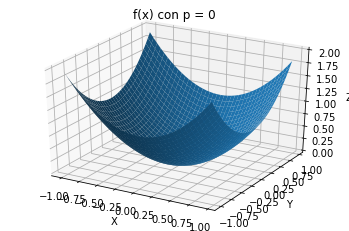

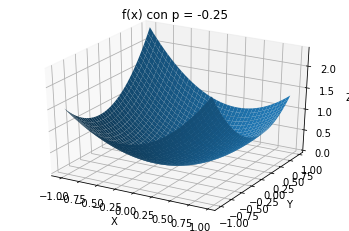

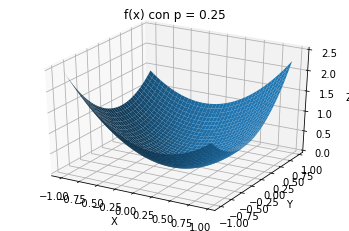

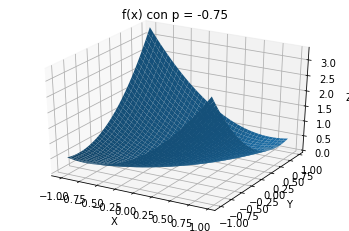

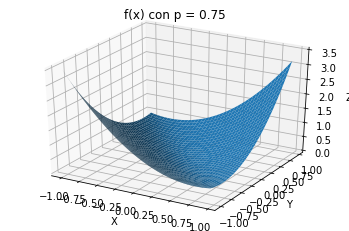

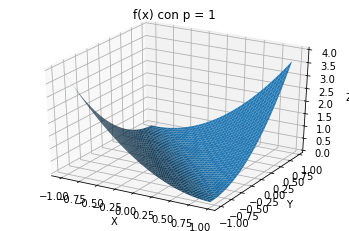

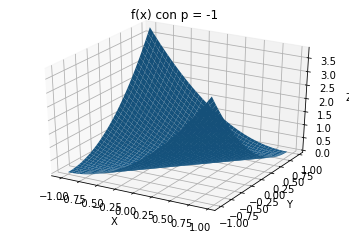

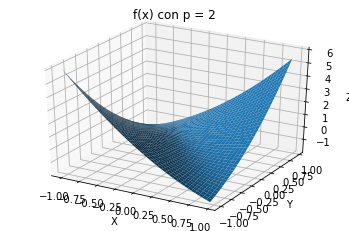

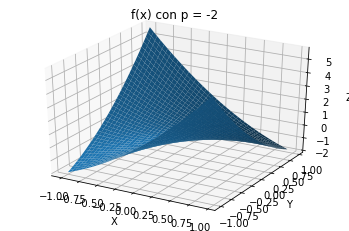

In [6]:
# Se declara una lista con todos los posibles valores de rho, para poder graficar de manera iterativa.
rho = [0, -0.25, 0.25, -0.75, 0.75, 1, -1, 2, -2]

for p in rho:
    A = np.array([[1, p],[p, 1]])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(-1, 1, 0.05)
    X, Y = np.meshgrid(x, y)
    # La forma cuadrática es diferente dependiendo del valor de rho.
    Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.title(f'f(x) con p = {p}')
    plt.show()

### b)  
Gráfica de contornos con el uso de la función *contourf* y función *colorbar* de matplotlib.

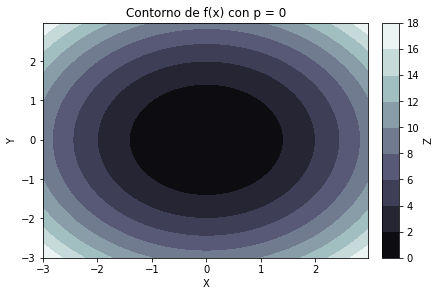

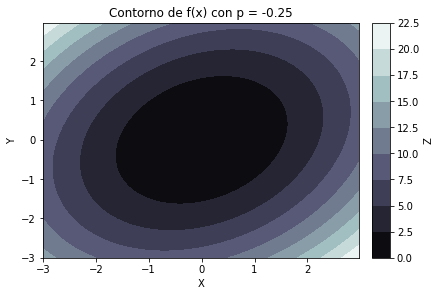

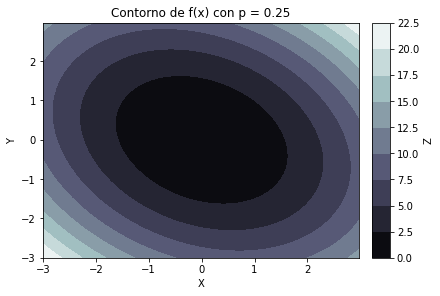

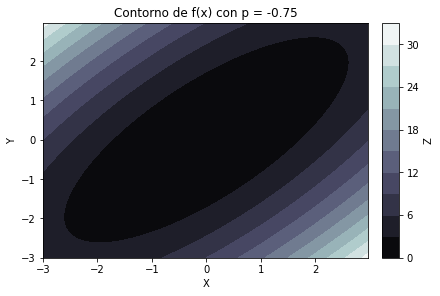

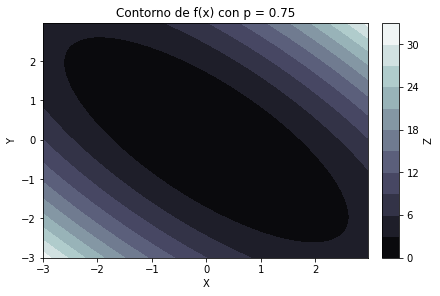

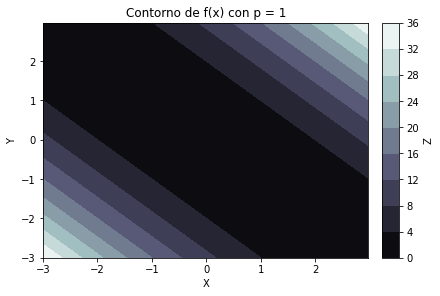

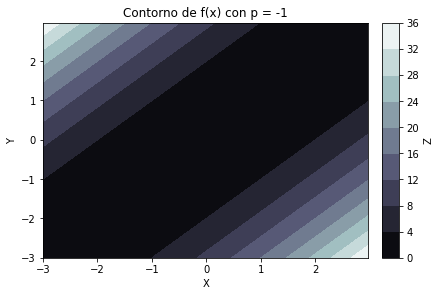

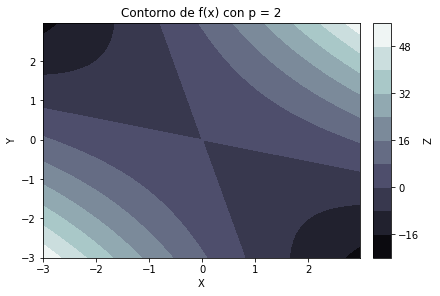

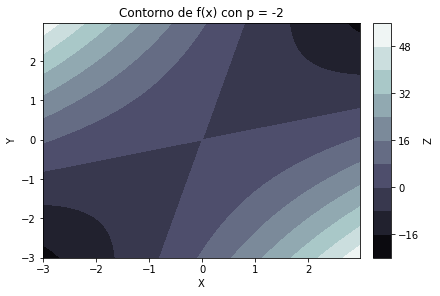

In [72]:
# Límites inferior y superior para los ejes en los que se graficará cada curva de contorno.
inf = -3
sup = 3

for p in rho:
    
    # La matriz cambia de acuerdo al valor de rho.
    A = np.array([[1, p],[p, 1]])

    delta = 0.025

    x = y = np.arange(inf, sup, delta)
    X, Y = np.meshgrid(x, y)
    
    # Forma cuadrática asociada a la matriz.
    Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

    fig1, ax2 = plt.subplots(constrained_layout=True)
    CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)
    ax2.set_title(f'Contorno de f(x) con p = {p}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    
    # Color bar
    cbar = fig1.colorbar(CS)
    cbar.ax.set_ylabel('Z')
    plt.show()

### c) 
Valores y vectores propios de la matriz $A_\rho$ para cada posible valor de $\rho$.

In [8]:
for p in rho:
    A = np.array([[1,p],[p,1]])
    l, v = LA.eig(A)
    print(f'\np = {p}')
    print(f'Matriz A_p: \n {A}')
    print(f'Valores propios: \n {l}')
    print(f'Vectores propios: \n {v}')


p = 0
Matriz A_p: 
 [[1 0]
 [0 1]]
Valores propios: 
 [1. 1.]
Vectores propios: 
 [[1. 0.]
 [0. 1.]]

p = -0.25
Matriz A_p: 
 [[ 1.   -0.25]
 [-0.25  1.  ]]
Valores propios: 
 [1.25 0.75]
Vectores propios: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

p = 0.25
Matriz A_p: 
 [[1.   0.25]
 [0.25 1.  ]]
Valores propios: 
 [1.25 0.75]
Vectores propios: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

p = -0.75
Matriz A_p: 
 [[ 1.   -0.75]
 [-0.75  1.  ]]
Valores propios: 
 [1.75 0.25]
Vectores propios: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

p = 0.75
Matriz A_p: 
 [[1.   0.75]
 [0.75 1.  ]]
Valores propios: 
 [1.75 0.25]
Vectores propios: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

p = 1
Matriz A_p: 
 [[1 1]
 [1 1]]
Valores propios: 
 [2. 0.]
Vectores propios: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

p = -1
Matriz A_p: 
 [[ 1 -1]
 [-1  1]]
Valores propios: 
 [2. 0.]
Vectores propios: 
 [[ 0.70710678  0.70710678]
 [-0.70

## Punto 3

Se consideran las matrices $A_1, A_2, A_3, A_4$ del punto 1.

### a) 

Se encuentra que los vectores propios de cada matriz ya tienen magnitud unitaria. Se construyen los vectores $\lambda_1v_1$ y $\lambda_2v_2$ y se grafican en el plano.

In [84]:
c=0

# A cada matriz se le encuentras sus valores y vectores propios, y se guardan estos valores en distintas variables.
# Como los valores propios están expresados como compoinentes de un vector fila, se debe hacer referencia al valor 
# deseado por medio de notación vectorial de numpy y lo mismo aplica para obtener los vectores propios, que son las
# columnas del parámetro v.
for mat in matrices:
    c+=1
    l, v = LA.eig(mat)
    if c==1:
        a1 = l[0]*v[:,0]
        a11 = l[1]*v[:,1]
    elif c==2:
        a2 = l[0]*v[:,0]
        a22 = l[1]*v[:,1]
    elif c==3:
        a3 = l[0]*v[:,0]
        a33 = l[1]*v[:,1]
    elif c==4:
        a4 = l[0]*v[:,0]
        a44 = l[1]*v[:,1]
        
print(f'Vectores de la matriz A1: \n v1: {a1} \n v2: {a11}\n')
print(f'Vectores de la matriz A2: \n v1: {a2} \n v2: {a22}\n')
print(f'Vectores de la matriz A3: \n v1: {a3} \n v2: {a33}\n')
print(f'Vectores de la matriz A4: \n v1: {a4} \n v2: {a44}')

Vectores de la matriz A1: 
 v1: [1. 0.] 
 v2: [0. 3.]

Vectores de la matriz A2: 
 v1: [-9. -0.] 
 v2: [-0. -9.]

Vectores de la matriz A3: 
 v1: [4.24264069 4.24264069] 
 v2: [ 2.82842712 -2.82842712]

Vectores de la matriz A4: 
 v1: [4.24264069 4.24264069] 
 v2: [-2.82842712  2.82842712]


Las variables $a_i$ y $a_{ii}$ para $i=1:4$ representan los vectores $\lambda_iv_i$ de la matriz $A_i$.

In [65]:
# Se declara esta función para evaluar la forma cuadrática asociada a una matriz A y a un vector v.
def formacuad(v, A):
    return A[0,0]*v[0]**2 + (A[0,1] + A[1,0])*v[0]*v[1] + A[1,1]*v[1]**2

Información sobre cómo graficar vectores en R2 se encontró [aquí](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib).

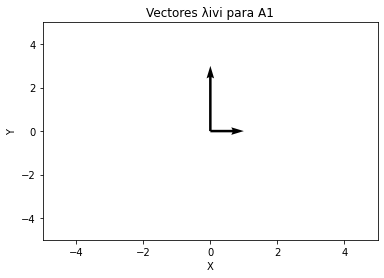

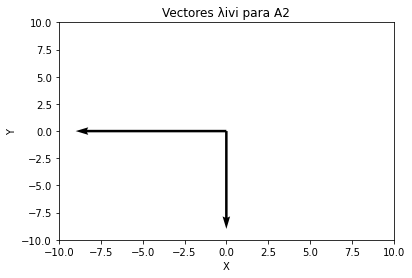

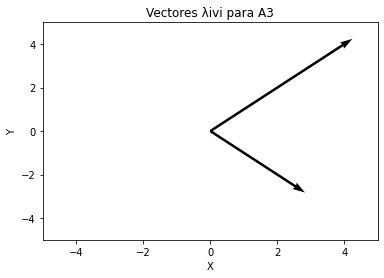

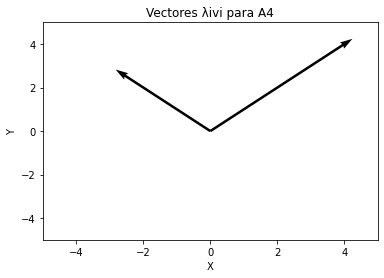

In [78]:
# Se grafican los vectores encontrados previamente en el plano, para cada matriz.
# Se usa la función quiver para crear los vectores en el plano.
c=0
for mat in matrices:
    c+=1    
    if c==1:
        # Creación de la figura y de los vectores.
        plt.figure()
        ax = plt.gca()
        plt.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a11[0], a11[1], angles='xy', scale_units='xy', scale=1)
        # Títulos y ejes.
        ax.set_title(f'Vectores λivi para A1')
        ax.set_xlim([-5, 5])
        ax.set_ylim([-5, 5])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()
    elif c==2:
        # Creación de la figura y de los vectores.
        plt.figure()
        ax = plt.gca()
        plt.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a22[0], a22[1], angles='xy', scale_units='xy', scale=1)
        # Títulos y ejes.
        ax.set_title(f'Vectores λivi para A2')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()
    elif c==3:
        # Creación de la figura y de los vectores.
        plt.figure()
        ax = plt.gca()
        plt.quiver(0, 0, a3[0], a3[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a33[0], a33[1], angles='xy', scale_units='xy', scale=1)
        # Títulos y ejes.
        ax.set_title(f'Vectores λivi para A3')
        ax.set_xlim([-5, 5])
        ax.set_ylim([-5, 5])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()
    elif c==4:
        # Creación de la figura y de los vectores.
        plt.figure()
        ax = plt.gca()
        plt.quiver(0, 0, a4[0], a4[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a44[0], a44[1], angles='xy', scale_units='xy', scale=1)
        # Títulos y ejes.
        ax.set_title(f'Vectores λivi para A4')
        ax.set_xlim([-5, 5])
        ax.set_ylim([-5, 5])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()

### b)

Curvas de contorno con los vectores del apartado pasado sobre la misma gráfica.

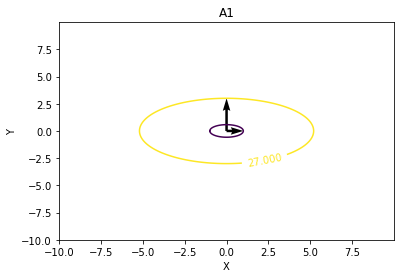

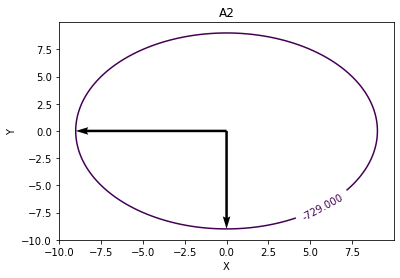

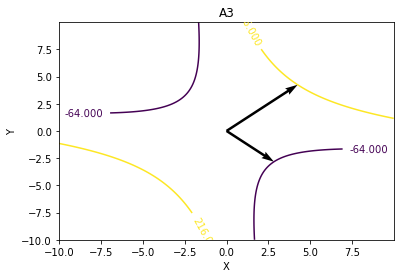

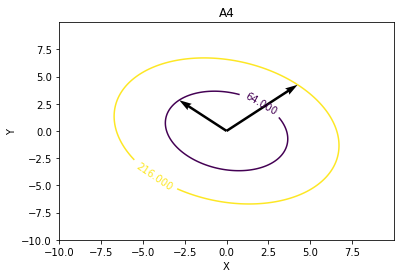

In [79]:
# Se hace exactamente lo mismo, pero ahora se ponen las gráficas de contorno en la misma gráfica de los vectores.

# Contador para identificar cada matriz.
c=0
for mat in matrices:
    
    step = 0.025
    x = np.arange(-10, 10, step)
    y = np.arange(-10, 10, step)

    X, Y = np.meshgrid(x, y)
    # Se declara la forma cuadrática, que va a ser diferente para cada matriz.
    Z = mat[0,0]*X**2 + (mat[0,1] + mat[1,0])*X*Y + mat[1,1]*Y**2
    
    c+=1
    
    if c==1:
        # Creación del contorno
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z, [formacuad(a1, A1), formacuad(a11, A1)])
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title(f'A1')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Creación de los vectores
        plt.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a11[0], a11[1], angles='xy', scale_units='xy', scale=1)
        plt.show()
    elif c==2:
        # Creación del contorno.
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z, [formacuad(a2, A2)])
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title(f'A2')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Creación de los vectores
        plt.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a22[0], a22[1], angles='xy', scale_units='xy', scale=1)
        plt.show()
    elif c==3:
        # Creación del contorno
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z, [formacuad(a33, A3), formacuad(a3, A3)])
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title(f'A3')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Creación de los vectores
        plt.quiver(0, 0, a3[0], a3[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a33[0], a33[1], angles='xy', scale_units='xy', scale=1)
        plt.show()
    elif c==4:
        # Creación del contorno
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z, [formacuad(a44, A4), formacuad(a4, A4)])
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title(f'A4')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Creación de los vectores
        plt.quiver(0, 0, a4[0], a4[1], angles='xy', scale_units='xy', scale=1)
        plt.quiver(0, 0, a44[0], a44[1], angles='xy', scale_units='xy', scale=1)
        plt.show()

## Punto 4

Se considera la forma cuadrática $$q(x,y) =  4x^{2} + 2xy - 3y^{2}$$

### a) 

Se usan las funciones *plot_surface*, *contour* y *contourf* para graficar esta función.

In [73]:
# Matriz asociada a la forma cuadrática
A = np.array([[4,1],[1,-3]])

Gráfica con *plot_surface*

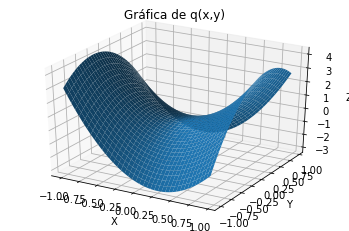

In [74]:
# Gráfica usando plot_surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(x, y)

# Forma cuadrática en términos de la matriz A.
Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title(f'Gráfica de q(x,y)')
plt.show()

Gráfica con *contour*

Text(0.5, 1.0, 'Contorno de q(x,y)')

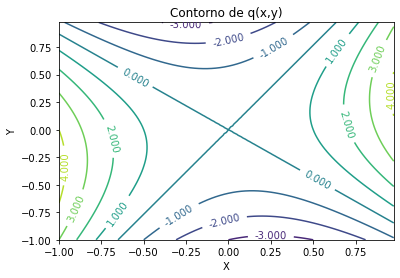

In [80]:
step = 0.025
x = np.arange(-1.0, 1.0, step)
y = np.arange(-1.0, 1.0, step)

X, Y = np.meshgrid(x, y)
Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_title(f'Contorno de q(x,y)')

Gráfica con *contourf*

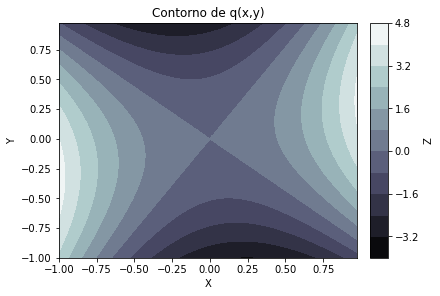

In [76]:
inf = -1
sup = 1

delta = 0.025

x = y = np.arange(inf, sup, delta)
X, Y = np.meshgrid(x, y)

# Forma cuadrática asociada a la matriz A
Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)
ax2.set_title('Contorno de q(x,y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Color bar
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Z')
plt.show()

### b) 

Se obtiene la gráfica de contorno con los vectores propios en el mismo plano.

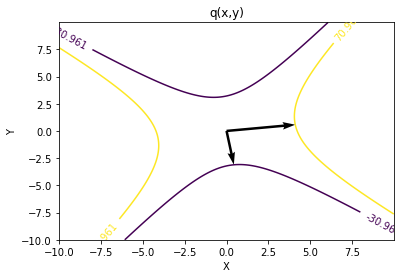

In [83]:
# Se obtienen los valores y vectores propios de la matriz.
l, v = LA.eig(A)

# Se crean variables λivi para cada vector valor y vector propio de la forma cuadrática.
a5 = l[0]*v[:,0]
a55 = l[1]*v[:,1]

step = 0.025
x = np.arange(-10, 10, step)
y = np.arange(-10, 10, step)

X, Y = np.meshgrid(x, y)

# Forma cuadrática asociada a la matriz A.
Z = A[0,0]*X**2 + (A[0,1] + A[1,0])*X*Y + A[1,1]*Y**2

# Se grafica el contorno de la función.
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [formacuad(a55, A), formacuad(a5, A)])
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title(f'q(x,y)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Se grafican los vectores.
plt.quiver(0, 0, a5[0], a5[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, a55[0], a55[1], angles='xy', scale_units='xy', scale=1)
plt.show()